In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import re
import nltk

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
data = pd.read_csv(r"C:\Users\afrin\Documents\Amazon Fine Food Reviews\data\processed\Reviews.csv")

In [13]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

final_stopwords.add("one")
print(final_stopwords)

{'yours', 'than', 'these', 'me', 'the', 'when', 're', 'further', 'that', 'by', 'with', 'through', 'below', 'about', 'in', 'very', 'while', 'were', 'hadn', "she's", 'all', 'hers', 'whom', 'why', 'd', 'they', "you're", 'and', 'be', 'your', 'again', 'there', 'only', 'its', "that'll", 'up', 'off', 'for', 'been', 'few', 'mightn', 'm', 'shouldn', 'it', 'was', 'didn', 'ma', 'he', 'myself', 'some', 'her', 'ourselves', 'between', 'weren', 'just', 'during', 'own', 'where', "you'll", 'yourself', 'down', "you've", 'after', 'if', 'ain', 'won', 'into', 'mustn', 'him', 'are', 'at', 'what', 'out', "it's", 'but', 'ours', 'above', "should've", 'do', 'can', 'to', 'o', 'y', 'himself', 'should', 'wasn', 'am', 'too', 'themselves', 've', 'did', 'she', 'over', 'had', 'those', 'don', 'does', 'have', 'doing', 'under', 'who', 'a', 'his', 'or', 'against', 'wouldn', 't', 'we', 'before', 'hasn', 'our', "you'd", 'more', 'couldn', 'herself', 'you', 'll', 'being', 'most', 'yourselves', 'their', 'doesn', 'this', 'which

In [14]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------

In [15]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)

    # remove digits
    review = review.translate(remove_digits)

    # lower case all letters
    review = review.lower()

    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()

    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]

    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])

    return review

In [16]:
print("Before preprocessing : ")
data.Text.iloc[6]

Before preprocessing : 


"This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wrapped well.  None of the candies were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this candy!  I served it at a beach-themed party and everyone loved it!"

In [17]:
# apply preprocessing function

data.Text = data.Text.apply(preprocessor)
print("After preprocessing : ")
data.Text.iloc[6]

After preprocessing : 


'saltwat taffi great flavor soft chewi candi individu wrap well none candi stuck togeth happen expens version fraling would highli recommend candi serv beachthem parti everyon love'

In [18]:
#WordCloud
def generate_wcloud(text):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords = stopwords, background_color = 'white')
    wordcloud.generate(text)

    plt.figure(figsize = (15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    return plt.show()

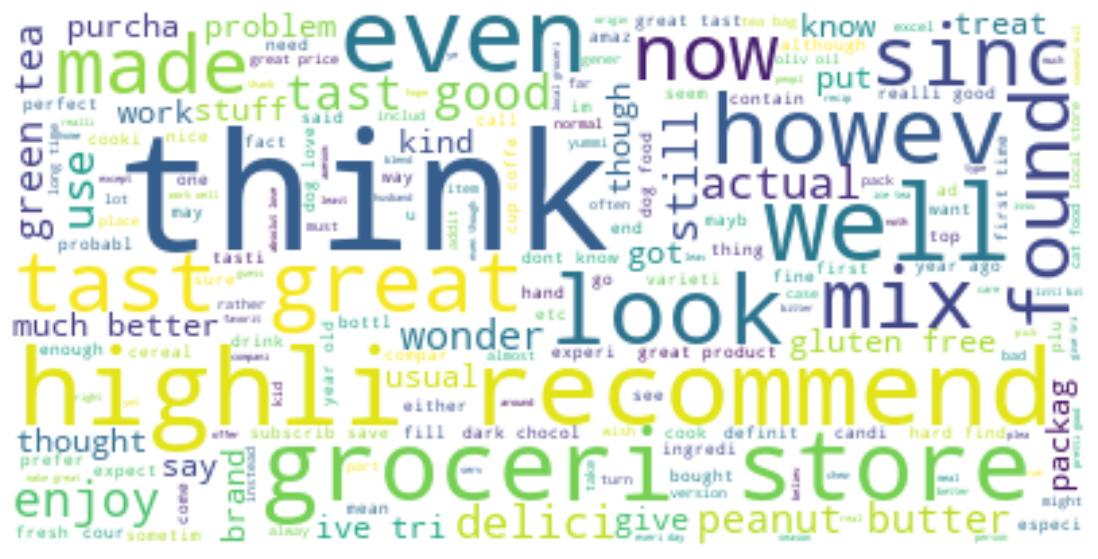

In [19]:
#Positive reviews
pos = data.loc[data.target == "Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

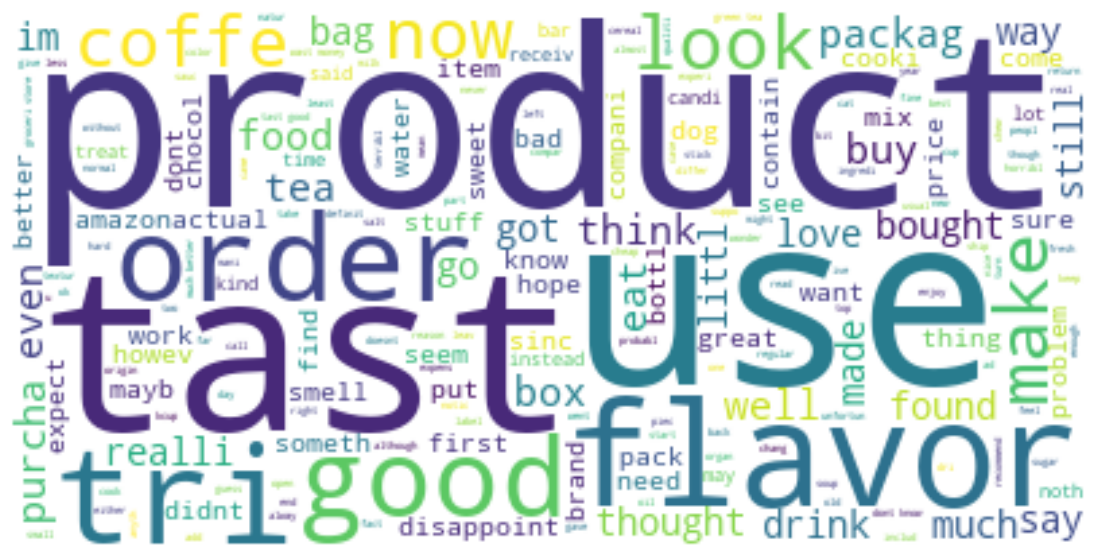

In [20]:
#Negative reviews
pos = data.loc[data.target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

In [21]:
pd.set_option('display.max_colwidth', None)
data[['Score', 'target', 'Text']].sample(5)

,Score,target,Text
352344,5,Positive,love coffeeth flavor great gotten first bag discount storethen went back bought began search find viola amazon rescu
93345,5,Positive,great pack prefect condit good use wing turn good order againthank
344559,5,Positive,mustard mani pepper piec could almost consid relish got wonder balanc heat sweet without much eitheri big fan blue coyot hot mustard relish discontinu year ago mcness bratwurst mustard good substitut disappear also made mcness next best thing even though bit expensivemi local fresh market quit carri im thrill find amazoncom
42983,1,Negative,receiv curri leav rotten appal compani ship item custom
213358,4,Positive,sugar free milk chocol raspberri jelli candi realli great tast would never know sugar free thing could make better cover sugar free dark chocol
